# Relatório de Análise VIII
## Identificando e Removendo Outliers

In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(14,6))

In [20]:
dados= pd.read_csv('dados/aluguel_residencial.csv', sep=';')
valor = dados['Valor']

In [21]:
dados.max(numeric_only=True)

Unnamed: 0      21825.0
Quartos            14.0
Vagas            1960.0
Suites             14.0
Area             3000.0
Valor         4500000.0
Condominio    6552570.0
IPTU           450625.0
dtype: float64

In [22]:
dados.min(numeric_only=True)

Unnamed: 0      0.0
Quartos         0.0
Vagas           0.0
Suites          0.0
Area           10.0
Valor         100.0
Condominio      0.0
IPTU            0.0
dtype: float64

In [23]:
dados.mean().round(4)

Unnamed: 0    10912.5000
Quartos           2.5257
Vagas             1.3111
Suites            0.9591
Area            138.1593
Valor          5046.1728
Condominio     1562.5833
IPTU            576.9187
dtype: float64

In [24]:
#Boxplot separa medianas ao meio e outliers ficam separados

In [25]:
q1 = dados['Valor'].quantile(.25)
q3= dados.Valor.quantile(0.75)
iiq = q3-q1
limite_inferior = q1- .15*iiq
limite_superior = q3+ .15*iiq

In [26]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

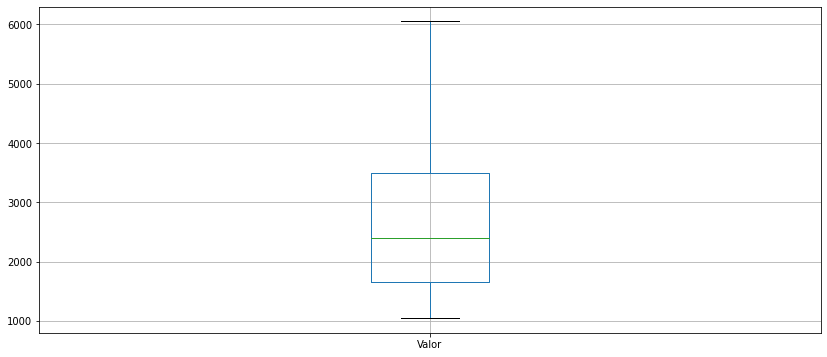

In [27]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

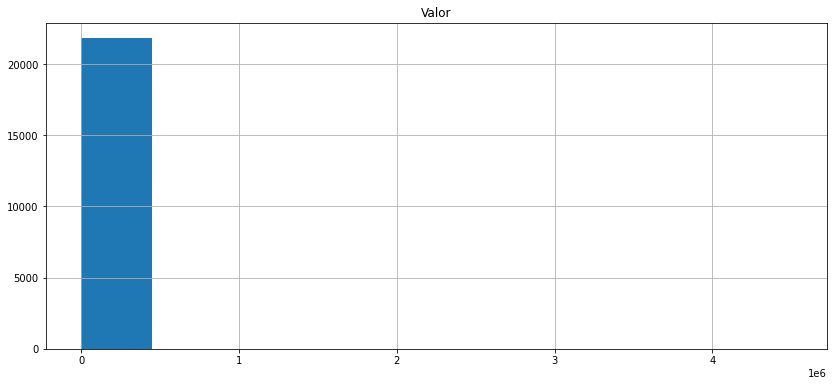

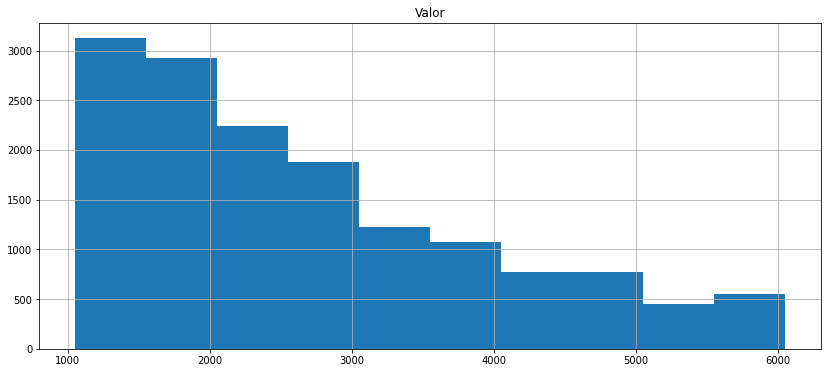

In [28]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

# Exercício

In [29]:
dados= pd.read_csv('dados/aluguel_amostra.csv', sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento


In [30]:
valores = dados['Valor m2']
Q1 = valores.quantile(0.25)
Q3 = valores.quantile(0.75)
IIQ = Q3-Q1 
limite_inferior= Q1-1.5*IIQ
limite_superior= Q3+1.5*IIQ
print('Q1 = {}. Q3= {}. IIQ= {}. Q1-1.5*IIQ= {}. Q3+1.5*IIQ= {}'.format(Q1,Q3,IIQ, limite_inferior, limite_superior))

Q1 = 21.25. Q3= 42.31. IIQ= 21.060000000000002. Q1-1.5*IIQ= -10.340000000000003. Q3+1.5*IIQ= 73.9


# Indentificando e Removendo Outliers(Continuação)

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

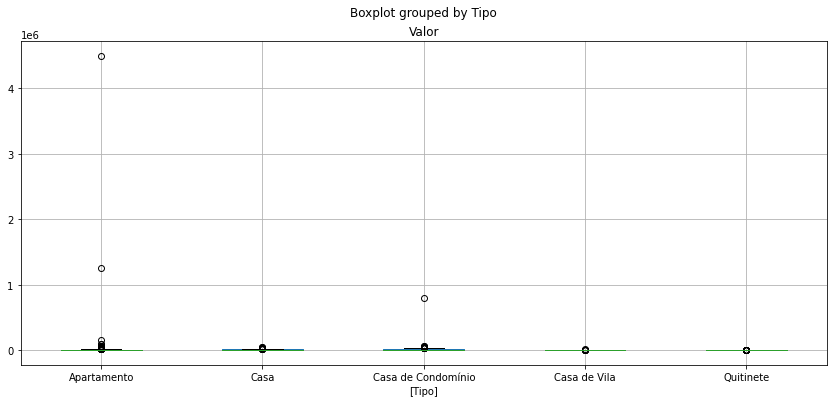

In [31]:
dados.boxplot(['Valor'], by= ['Tipo'])

In [32]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [33]:
type(grupo_tipo)
grupo_tipo.groups

{'Apartamento': Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
            dtype='int64', length=8613),
 'Casa': Int64Index([  13,   31,   50,   54,   74,  109,  115,  123,  127,  172,
             ...
             9667, 9723, 9750, 9783, 9831, 9861, 9870, 9888, 9894, 9903],
            dtype='int64', length=426),
 'Casa de Condomínio': Int64Index([  69,   71,   72,   76,   93,  117,  118,  122,  128,  215,
             ...
             9657, 9670, 9689, 9691, 9746, 9770, 9784, 9898, 9920, 9981],
            dtype='int64', length=454),
 'Casa de Vila': Int64Index([  23,   53,   91,  269,  444,  627,  809,  836,  871, 1081,
             ...
             9132, 9177, 9239, 9260, 9264, 9345, 9601, 9707, 9889, 9959],
            dtype='int64', length=117),
 'Quitinete': Int64Index([  28,   45,   57,   65,   67,  137,  155,  162,  174,  222,
             ...
             9647, 

In [34]:
valores = grupo_tipo
Q1 = valores.quantile(0.25)
Q3 = valores.quantile(0.75)
IIQ = Q3-Q1 
limite_inferior= Q1-1.5*IIQ
limite_superior= Q3+1.5*IIQ

In [35]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    3925.0
Casa de Vila           800.0
Quitinete              900.0
Name: Valor, dtype: float64

In [36]:
Q3

Tipo
Apartamento            5000.0
Casa                   9000.0
Casa de Condomínio    16000.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [37]:
IIQ

Tipo
Apartamento            3300.0
Casa                   7900.0
Casa de Condomínio    12075.0
Casa de Vila           1000.0
Quitinete               600.0
Name: Valor, dtype: float64

In [38]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -10750.0
Casa de Condomínio   -14187.5
Casa de Vila           -700.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [39]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  20850.0
Casa de Condomínio    34112.5
Casa de Vila           3300.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [44]:
dados_new= pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    tipo_correto = dados['Tipo'] == tipo
    dentro_limite= (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao= tipo_correto & dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

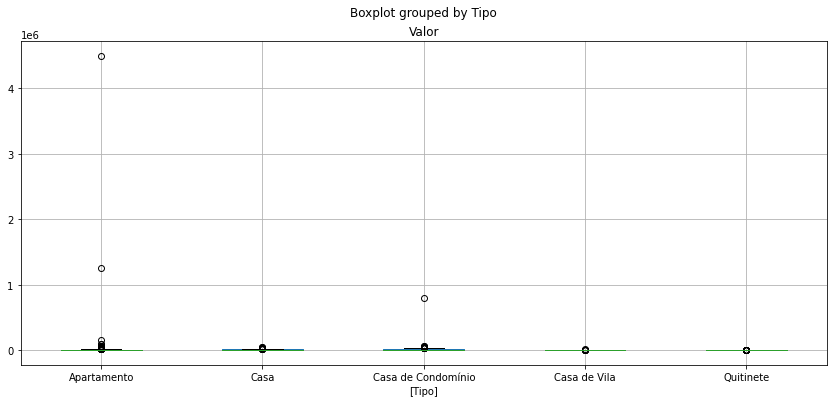

In [45]:
dados.boxplot(['Valor'], by= ['Tipo'])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

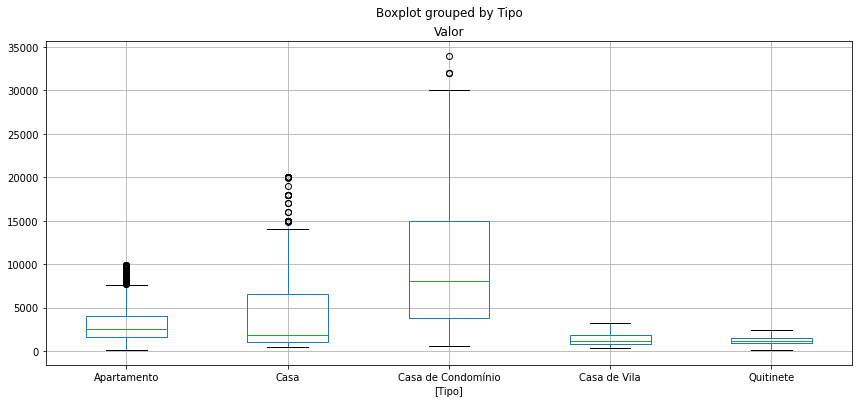

In [43]:
dados_new.boxplot(['Valor'], by= ['Tipo'])

In [42]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep=';', index=False)